In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

This code was provided as starter code:


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
with open('/content/drive/MyDrive/NLP_compeditions_datasets/Data2/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [7]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
for language_pair, language_data in data.items():
  print(f"Language Pair: {language_pair}")


Language Pair: English-Bengali
Language Pair: English-Hindi


In [10]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Hindi"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Hindi
  Data Type: Train


In [11]:
with open('/content/drive/MyDrive/NLP_compeditions_datasets/Data2/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [12]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Hindi"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Hindi
  Data Type: Validation


In [13]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

80797
80797
11543
0


In [14]:
x={'English':source_sentences_train,'Hindi':target_sentences_train}

In [15]:
df=pd.DataFrame(x)

In [16]:
df

,English,Hindi
0,cancel everything on my calendar,मेरे कैलेंडर पर सब कुछ रद्द करें
1,Adrenal hormone levels are at their peak durin...,अधिवृक्क के हार्मोन का स्तर प्रातःकाल में अपने...
2,"Golden threads are obtained from Surat, the qu...","स्वर्ण धागे सूरत से प्राप्त होते हैं, जिनकी गु..."
3,Look for agglutination within 30 seconds.,30 सेकेण्ड के भीतर एग्लूटिनेशन देखें।
4,The non-pompousness and informality of their l...,उनके जीवन की आडंबरहीनता एवं अनौपचारिकता उनके स...
...,...,...
80792,"So, is it that this is the optimization proble...","तो, यह अनुकूलन समस्या है जिसमें हम रुचि रखते थे।"
80793,In this Masjid made with red stones there are ...,लाल पत्थरों से बनायी गयी इस मस्जिद में हिन्दू ...
80794,"He began to work on the movie on August 17, 20...","उन्होंने 17 अगस्त, 2010 को फिल्म पर काम करना श..."
80795,start a new shopping list,एक नई खरीदारी सूची शुरू करें


In [17]:
import nltk
from collections import Counter

In [18]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [19]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [20]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [28]:
!pip install nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [29]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
hindi_tokens = preprocess(target_sentences_train)
hindi_test=preprocess(target_sentences_val)

In [30]:
en_train=english_tokens
en_test=english_test
de_train=hindi_tokens
de_test=hindi_test

In [31]:
en_index2word = ["<PAD>", "<SOS>", "<EOS>","<UNK>"]
de_index2word = ["<PAD>", "<SOS>", "<EOS>","<UNK>"]

for ds in [en_train, en_test]:
    for sent in ds:
        for token in sent:
            if token not in en_index2word:
                en_index2word.append(token)

for ds in [de_train, de_test]:
    for sent in ds:
        for token in sent:
            if token not in de_index2word:
                de_index2word.append(token)

In [ ]:
import pickle



with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/en_index2word.pkl", "wb") as file:
    pickle.dump(en_index2word, file)


with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/de_index2word.pkl", "wb") as file:
    pickle.dump(de_index2word, file)



In [ ]:
with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/en_index2word.pkl", "rb") as file:
    en_index2word = pickle.load(file)

with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/de_index2word.pkl", "rb") as file:
    de_index2word = pickle.load(file)

In [32]:
en_index2word

['<PAD>',
 '<SOS>',
 '<EOS>',
 '<UNK>',
 'cancel',
 'everything',
 'on',
 'my',
 'calendar',
 'adrenal',
 'hormone',
 'levels',
 'are',
 'at',
 'their',
 'peak',
 'during',
 'the',
 'morning',
 'and',
 'taper',
 'off',
 'evening',
 'reaching',
 'a',
 'low',
 'level',
 'around',
 'am',
 'an',
 'important',
 'function',
 'of',
 'these',
 'hormones',
 'is',
 'to',
 'regulate',
 'vascular',
 'muscle',
 'tone',
 'prevent',
 'vasocodilation',
 'golden',
 'threads',
 'obtained',
 'from',
 'surat',
 'quality',
 'being',
 'yards',
 'meters',
 'per',
 'tola',
 'grams',
 'look',
 'for',
 'agglutination',
 'within',
 'seconds',
 'nonpompousness',
 'informality',
 'life',
 'reflected',
 'in',
 'literature',
 'also',
 'world',
 'chess',
 'championship',
 'which',
 'kramnik',
 'beat',
 'fide',
 'champion',
 'veselin',
 'topalov',
 'reunified',
 'titles',
 'made',
 'undisputed',
 'heavily',
 'embroidered',
 'rugs',
 'shawls',
 'produced',
 'gujarat',
 '’',
 's',
 'handloom',
 'workshops',
 'simply',
 

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [34]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
de_word2index = {token: idx for idx, token in enumerate(de_index2word)}

In [ ]:
len(en_word2index)

61209

In [36]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in de_train])/len(de_train)

In [37]:
seq_length = 20

In [ ]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: 
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] if w in vocab else vocab["UNK"] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else:
        encoded = [vocab[w] if w in vocab else vocab["UNK"] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [39]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
de_train_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_train]
de_test_encoded = [encode_and_pad(de_word2index, sent, seq_length) for sent in de_test]

In [40]:
en_train_encoded[1]

[1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 16, 17, 22, 23, 24, 2]

In [41]:
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(de_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(de_test_encoded)

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x))


train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
#test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

In [42]:
train_x[1]

array([ 1,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 16, 17, 22,
       23, 24,  2])

In [43]:
train_ds[1]

(tensor([ 1,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 16, 17, 22, 23,
         24,  2]),
 tensor([ 1, 11, 12, 13, 14, 15, 16, 17, 18, 19,  6, 20, 21, 22, 23, 24, 25, 26,
         27,  2]))

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # Embedding layer
        self.embedding = nn.Embedding(input_size, hidden_size, padding_idx=0)

        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

    def forward(self, input, hidden):
        embedded = self.embedding(input)
        output = embedded

        output, hidden = self.gru(output, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, batch_size, self.hidden_size)

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size

        # Embedding layer
        self.embedding = nn.Embedding(output_size, hidden_size, padding_idx=0)

        self.gru = nn.GRU(hidden_size, hidden_size)

        self.out = nn.Linear(hidden_size, output_size)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output = self.embedding(input)

        output = F.relu(output)

        output, hidden = self.gru(output, hidden)

        output = self.softmax(self.out(output[0]))

        return output, hidden


In [46]:
hidden_size = 128


In [47]:
seq_length = 20

In [48]:
encoder = EncoderRNN(len(en_index2word), hidden_size).to(device)
decoder = DecoderRNN(hidden_size, len(de_index2word)).to(device)

In [49]:
encoder

EncoderRNN(
  (embedding): Embedding(61209, 128, padding_idx=0)
  (gru): GRU(128, 128, batch_first=True)
)

In [50]:
decoder

DecoderRNN(
  (embedding): Embedding(72203, 128, padding_idx=0)
  (gru): GRU(128, 128)
  (out): Linear(in_features=128, out_features=72203, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [51]:
criterion = nn.CrossEntropyLoss()
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr = 3e-3)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr = 3e-3)

In [52]:
losses = []

In [ ]:
input_length = target_length = seq_length

SOS = en_word2index["<SOS>"]
EOS = en_word2index["<EOS>"]

epochs = 1

for epoch in range(epochs):
    for idx, batch in enumerate(train_dl):

        encoder_hidden = encoder.initHidden()

        encoder_hidden = encoder_hidden.to(device)

        input_tensor = batch[0].to(device)

        target_tensor = batch[1].to(device)


        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        with torch.set_grad_enabled(True):

            encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)

            dec_result = torch.zeros(target_length, batch_size, len(de_index2word)).to(device)

            decoder_input = target_tensor[:, 0].unsqueeze(dim=0).to(device)

            decoder_hidden = encoder_hidden

            for i in range(1, target_length):

                # Feed input and previous hidden states
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)

                best = decoder_output.argmax(1)

                decoder_input = best.unsqueeze(dim=0)

                dec_result[i] = decoder_output


            scores = dec_result.transpose(1, 0)[1:].reshape(-1, dec_result.shape[2])
            targets = target_tensor[1:].reshape(-1)

            # Calculating loss
            loss = criterion(scores, targets)

            # Performing backprop and clipping excess gradients
            loss.backward()

            torch.nn.utils.clip_grad_norm_(encoder.parameters(), max_norm=1)
            torch.nn.utils.clip_grad_norm_(decoder.parameters(), max_norm=1)

            enc_optimizer.step()
            dec_optimizer.step()

            # Keeping track of loss
            losses.append(loss.item())
            if idx % 100 == 0:
                print(idx, sum(losses)/len(losses))

0 11.205079078674316
100 6.984483378948552
200 6.628745387442669
300 6.461880096169406
400 6.349045900929895
500 6.263587581421325
600 6.208884914385499
700 6.157337637668669
800 6.11102347010828
900 6.067546342771405
1000 6.031376229418622
1100 6.003798129664672
1200 5.976478481769164
1300 5.949955594622108
1400 5.925145736002735
1500 5.902365128252206
1600 5.881585859492896


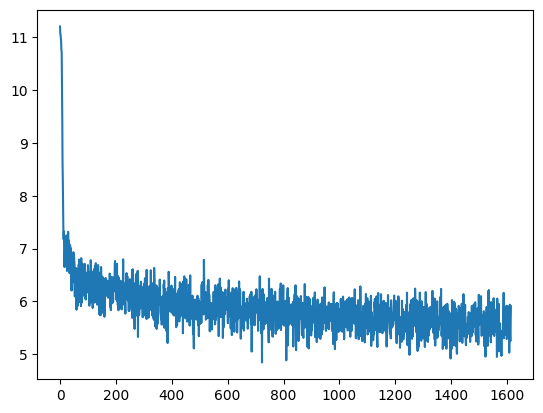

In [54]:
plt.plot(losses)

In [55]:
from tqdm import tqdm

In [56]:
val_ids = [ i for i,_ in data["English-Hindi"]["Validation"].items()]

In [57]:
val_outs = []
for i in tqdm(range(len(test_ds))):
  encoder_hidden = torch.zeros(1, 1, hidden_size).to(device)
  input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
  result = []
  with torch.set_grad_enabled(False):
    encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
    decoder_input = torch.tensor([SOS]).unsqueeze(dim=0).to(device)
    decoder_hidden = encoder_hidden
    for di in range(1, target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        best = decoder_output.argmax(1)
        result.append(de_index2word[best.to('cpu').item()])
        if best.item() == EOS:
            break

        decoder_input = best.unsqueeze(dim=0)
  result = [i for i in result if not i in ['<EOS>', '<PAD>', '<SOS>']]
  val_outs.append(" ".join(result))

100%|██████████| 11543/11543 [01:34<00:00, 121.74it/s]


In [58]:
df0 = pd.DataFrame()
df0["ID"] = val_ids
df0["Translation"] = val_outs

In [59]:
df0.to_csv('answersH.csv', index = False)

In [60]:
x=pd.read_csv("/content/answersH.csv")

In [61]:
x

,ID,Translation
0,505511,इस पर पर पर पर पर
1,505512,और और और
2,505513,हालांकि में में में रूप है है है है है है है ह...
3,505514,इसके के के के लिए के लिए के लिए लिए लिए नहीं नहीं
4,505515,राष्ट्रीय राष्‍ट्रीय उद्यान के के के के के के ...
...,...,...
11538,517049,दो के के के के के के के के के के के और और के क...
11539,517050,इस में में में में में में में में है में है ह...
11540,517051,मुझे में में में में में में में में दिखाएं
11541,517052,में में में में में में में में में में में ।


# Do the above same thing for English-Bengali.

In [69]:
with open('/content/drive/MyDrive/NLP_compeditions_datasets/Data2/train_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [70]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
for language_pair, language_data in data.items():
  print(f"Language Pair: {language_pair}")


Language Pair: English-Bengali
Language Pair: English-Hindi


In [73]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                target_sentences_val.append(target)
                id_val.append(entry_id)
              else:
                source_sentences_train.append(source)
                target_sentences_train.append(target)
                id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Train


In [74]:
with open('/content/drive/MyDrive/NLP_compeditions_datasets/Data2/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    data = json.load(file)

In [75]:
for language_pair, language_data in data.items():
    if(language_pair == "English-Bengali"):
      print(f"Language Pair: {language_pair}")
      for data_type, data_entries in language_data.items():
          print(f"  Data Type: {data_type}")
          for entry_id, entry_data in data_entries.items():
              source = entry_data["source"]
              #target = entry_data["target"]
              if (data_type == "Validation"):
                source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

Language Pair: English-Bengali
  Data Type: Validation


In [76]:
print(len(source_sentences_train))
print(len(target_sentences_train))

print(len(source_sentences_val))
print(len(target_sentences_val))

68849
68849
9836
0


In [77]:
x={'English':source_sentences_train,'Bengali':target_sentences_train}

In [78]:
df=pd.DataFrame(x)

In [79]:
df

,English,Bengali
0,Do not forget to visit the point where the Nar...,এই জায়গাগুলো দেখতে ভুলো না যেখানে নর্মদা নদী ম...
1,It is evident that the biggest cause of povert...,এই কথা স্পষ্ট যে দরিদ্রতার বড় কারণ হল অশিক্ষা ।
2,The film was released theatrically on 12 April...,চলচ্চিত্রটি ২০১৩ সালের ১২ই এপ্রিল প্রেক্ষাগৃহে...
3,is wyatt's birthday party at ten p. m.,অনিমেষ এর জন্মদিনের পার্টি রাত দশটায়
4,"Apart from being used as an eatable, barley is...",খাদ্যদ্রব্য ছাড়াও যব আরো বিভিন্ন ক্ষেত্রে যেমন...
...,...,...
68844,But it is evident that there is change in both...,তাও এটা প্রত্যক্ষভাবে দেখা যায় যে প্রিন্ট মিড...
68845,Include a detailed listing of all of your prod...,ছবি সহ সম্পূর্ণ করা আপনার সমস্ত পণ্যের একটি বি...
68846,"Each subcategory counts as one page, pages in ...",প্রতিটি উপবিভাগ একটি পৃষ্ঠা হিসাবে গণনা করা হয...
68847,It is one of the country's oldest state-run pu...,এটি দেশের সবচেয়ে পুরনো রাষ্ট্র-চালিত সরকারী বা...


In [80]:
import nltk
from collections import Counter

In [81]:
# Function to preprocess and remove punctuation and numbers
def preprocess_and_remove_punctuation(sentence):
    # Remove punctuation and numbers
    sentence = ''.join([char for char in sentence if char not in string.punctuation and not char.isdigit()])
    return sentence

In [82]:
# Tokenization and Lowercasing
def preprocess(sentences):
    tokenized_sentences = [nltk.word_tokenize(preprocess_and_remove_punctuation(sentence.lower())) for sentence in sentences]
    return tokenized_sentences

In [83]:
target_sentences_train = [re.sub(r'[a-zA-Z]','',hi) for hi in target_sentences_train] #optional

In [84]:
!pip install nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [85]:
english_tokens = preprocess(source_sentences_train)
english_test=preprocess(source_sentences_val)
Bengali_tokens = preprocess(target_sentences_train)
Bengali_test=preprocess(target_sentences_val)

In [86]:
en_train=english_tokens
en_test=english_test
be_train=Bengali_tokens
be_test=Bengali_test

In [87]:
# en_index2word = ["<PAD>", "<SOS>", "<EOS>","<UNK>"]
be_index2word = ["<PAD>", "<SOS>", "<EOS>","<UNK>"]

# for ds in [en_train, en_test]:
#     for sent in ds:
#         for token in sent:
#             if token not in en_index2word:
#                 en_index2word.append(token)

for ds in [be_train, be_test]:
    for sent in ds:
        for token in sent:
            if token not in be_index2word:
                be_index2word.append(token)

In [88]:
import pickle



# # Save as a pickle file
# with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/en_index2word.pkl", "wb") as file:
#     pickle.dump(en_index2word, file)


# Save as a pickle file
with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/be_index2word.pkl", "wb") as file:
    pickle.dump(be_index2word, file)



In [89]:
# Load the pickle file
with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/en_index2word.pkl", "rb") as file:
    en_index2word = pickle.load(file)

# Load the pickle file
with open("/content/drive/MyDrive/NLP_compeditions_datasets/Data2/de_index2word.pkl", "rb") as file:
    de_index2word = pickle.load(file)

In [ ]:
be_index2word

In [ ]:
en_index2word

['<PAD>',
 '<SOS>',
 '<EOS>',
 '<UNK>',
 'cancel',
 'everything',
 'on',
 'my',
 'calendar',
 'adrenal',
 'hormone',
 'levels',
 'are',
 'at',
 'their',
 'peak',
 'during',
 'the',
 'morning',
 'and',
 'taper',
 'off',
 'evening',
 'reaching',
 'a',
 'low',
 'level',
 'around',
 'am',
 'an',
 'important',
 'function',
 'of',
 'these',
 'hormones',
 'is',
 'to',
 'regulate',
 'vascular',
 'muscle',
 'tone',
 'prevent',
 'vasocodilation',
 'golden',
 'threads',
 'obtained',
 'from',
 'surat',
 'quality',
 'being',
 'yards',
 'meters',
 'per',
 'tola',
 'grams',
 'look',
 'for',
 'agglutination',
 'within',
 'seconds',
 'nonpompousness',
 'informality',
 'life',
 'reflected',
 'in',
 'literature',
 'also',
 'world',
 'chess',
 'championship',
 'which',
 'kramnik',
 'beat',
 'fide',
 'champion',
 'veselin',
 'topalov',
 'reunified',
 'titles',
 'made',
 'undisputed',
 'heavily',
 'embroidered',
 'rugs',
 'shawls',
 'produced',
 'gujarat',
 '’',
 's',
 'handloom',
 'workshops',
 'simply',
 

In [91]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [92]:
en_word2index = {token: idx for idx, token in enumerate(en_index2word)}
be_word2index = {token: idx for idx, token in enumerate(be_index2word)}

In [94]:
len(be_word2index)

101704

In [97]:
en_lengths = sum([len(sent) for sent in en_train])/len(en_train)
de_lengths = sum([len(sent) for sent in be_train])/len(be_train)
print(en_lengths)
print(de_lengths)

15.97735624337318
13.79722290810324


In [98]:
seq_length = 20

In [100]:
def encode_and_pad(vocab, sent, max_length):
    sos = [vocab["<SOS>"]]
    eos = [vocab["<EOS>"]]
    pad = [vocab["<PAD>"]]

    if len(sent) < max_length - 2: # -2 for SOS and EOS
        n_pads = max_length - 2 - len(sent)
        encoded = [vocab[w] if w in vocab else vocab["<UNK>"] for w in sent]
        return sos + encoded + eos + pad * n_pads
    else: # sent is longer than max_length; truncating
        encoded = [vocab[w] if w in vocab else vocab["<UNK>"] for w in sent]
        truncated = encoded[:max_length - 2]
        return sos + truncated + eos

In [101]:
en_train_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_train]
en_test_encoded = [encode_and_pad(en_word2index, sent, seq_length) for sent in en_test]
be_train_encoded = [encode_and_pad(be_word2index, sent, seq_length) for sent in be_train]
be_test_encoded = [encode_and_pad(be_word2index, sent, seq_length) for sent in be_test]

In [102]:
en_train_encoded[1]

[1,
 262,
 35,
 19166,
 323,
 17,
 486,
 725,
 32,
 5163,
 35,
 18653,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [103]:
batch_size = 50

train_x = np.array(en_train_encoded)
train_y = np.array(be_train_encoded)
test_x = np.array(en_test_encoded)
test_y = np.array(be_test_encoded)

train_ds = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
test_ds = TensorDataset(torch.from_numpy(test_x))



train_dl = DataLoader(train_ds, shuffle=True, batch_size=batch_size, drop_last=True)
#test_dl = DataLoader(test_ds, shuffle=True, batch_size=batch_size, drop_last=True)

In [104]:
train_x[1]

array([    1,   262,    35, 19166,   323,    17,   486,   725,    32,
        5163,    35, 18653,     2,     0,     0,     0,     0,     0,
           0,     0])

In [105]:
train_ds[1]

(tensor([    1,   262,    35, 19166,   323,    17,   486,   725,    32,  5163,
            35, 18653,     2,     0,     0,     0,     0,     0,     0,     0]),
 tensor([ 1,  4, 27, 28, 29, 30, 31, 32, 33, 34, 35,  2,  0,  0,  0,  0,  0,  0,
          0,  0]))

In [106]:
hidden_size = 128


In [107]:
seq_length = 20

In [108]:
encoder = EncoderRNN(len(en_index2word), hidden_size).to(device)
decoder = DecoderRNN(hidden_size, len(be_index2word)).to(device)

In [109]:
encoder

EncoderRNN(
  (embedding): Embedding(61209, 128, padding_idx=0)
  (gru): GRU(128, 128, batch_first=True)
)

In [110]:
decoder

DecoderRNN(
  (embedding): Embedding(101704, 128, padding_idx=0)
  (gru): GRU(128, 128)
  (out): Linear(in_features=128, out_features=101704, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [111]:
criterion = nn.CrossEntropyLoss()
enc_optimizer = torch.optim.Adam(encoder.parameters(), lr = 3e-3)
dec_optimizer = torch.optim.Adam(decoder.parameters(), lr = 3e-3)

In [112]:
losses = []

In [114]:
input_length = target_length = seq_length

SOS = en_word2index["<SOS>"]
EOS = en_word2index["<EOS>"]

epochs = 1

for epoch in range(epochs):
    for idx, batch in enumerate(train_dl):

        # Creating initial hidden states for the encoder
        encoder_hidden = encoder.initHidden()

        # Sending to device
        encoder_hidden = encoder_hidden.to(device)

        # Assigning the input and sending to device
        input_tensor = batch[0].to(device)

        # Assigning the output and sending to device
        target_tensor = batch[1].to(device)


        # Clearing gradients
        enc_optimizer.zero_grad()
        dec_optimizer.zero_grad()

        # Enabling gradient calculation
        with torch.set_grad_enabled(True):

            # Feeding batch into encoder
            encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)

            # This is a placeholder tensor for decoder outputs. We send it to device as well
            dec_result = torch.zeros(target_length, batch_size, len(be_index2word)).to(device)

            # Creating a batch of SOS tokens which will all be fed to the decoder
            decoder_input = target_tensor[:, 0].unsqueeze(dim=0).to(device)

            # Creating initial hidden states of the decoder by copying encoder hidden states
            decoder_hidden = encoder_hidden

            # For each time-step in decoding:
            for i in range(1, target_length):

                # Feed input and previous hidden states
                decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)

                # Finding the best scoring word
                best = decoder_output.argmax(1)

                # Assigning next input as current best word
                decoder_input = best.unsqueeze(dim=0)

                # Creating an entry in the placeholder output tensor
                dec_result[i] = decoder_output


            # Creating scores and targets for loss calculation
            scores = dec_result.transpose(1, 0)[1:].reshape(-1, dec_result.shape[2])
            targets = target_tensor[1:].reshape(-1)

            # Calculating loss
            loss = criterion(scores, targets)

            # Performing backprop and clipping excess gradients
            loss.backward()

            torch.nn.utils.clip_grad_norm_(encoder.parameters(), max_norm=1)
            torch.nn.utils.clip_grad_norm_(decoder.parameters(), max_norm=1)

            enc_optimizer.step()
            dec_optimizer.step()

            # Keeping track of loss
            losses.append(loss.item())
            if idx % 100 == 0:
                print(idx, sum(losses)/len(losses))

0 11.54976749420166
100 7.287375931692596
200 6.868903568134972
300 6.714414195760936
400 6.603422551381023
500 6.537629007579324
600 6.4848353842927295
700 6.44214148596248
800 6.410155457652612
900 6.368639644322199
1000 6.339233764282592
1100 6.3111663752529
1200 6.289830284849194
1300 6.268792961305329


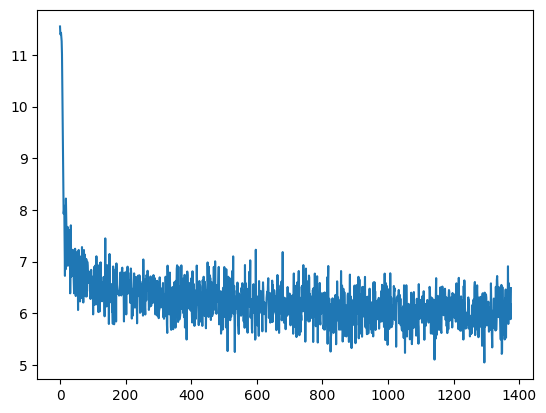

In [117]:
plt.plot(losses)

In [115]:
from tqdm import tqdm

In [116]:
val_ids = [ i for i,_ in data["English-Bengali"]["Validation"].items()]

In [118]:
val_outs = []
for i in tqdm(range(len(test_ds))):
  encoder_hidden = torch.zeros(1, 1, hidden_size).to(device)
  input_tensor = test_ds[i][0].unsqueeze(dim=0).to(device)
  result = []
  with torch.set_grad_enabled(False):
    encoder_output, encoder_hidden = encoder(input_tensor, encoder_hidden)
    decoder_input = torch.tensor([SOS]).unsqueeze(dim=0).to(device)
    decoder_hidden = encoder_hidden
    for di in range(1, target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        best = decoder_output.argmax(1)
        result.append(be_index2word[best.to('cpu').item()])
        if best.item() == EOS:
            break

        decoder_input = best.unsqueeze(dim=0)
  result = [i for i in result if not i in ['<EOS>', '<PAD>', '<SOS>']]
  val_outs.append(" ".join(result))

100%|██████████| 9836/9836 [01:23<00:00, 117.28it/s]


In [120]:
df1 = pd.DataFrame()
df1["ID"] = val_ids
df1["Translation"] = val_outs

In [121]:
df1.to_csv('answersB.csv', index = False)

In [122]:
x=pd.read_csv("/content/answersB.csv")

In [123]:
x

,ID,Translation
0,147532,এই থেকে থেকে থেকে থেকে থেকে এবং এবং এবং এবং এব...
1,147533,এই হল হল এবং এবং এবং এবং এবং এবং এবং এবং এবং
2,147534,সালে জাতীয় এবং এবং এবং এবং এবং এবং এবং এবং এব...
3,147535,সালে মন্দিরের মন্দিরের মন্দিরের
4,147536,ভারতের ভারতের একটি একটি একটি একটি এবং এবং একটি...
...,...,...
9831,157363,এই এই এই এই এই এই
9832,157364,এখানে এখানে এখানে এখানে
9833,157365,নিকটতম নিকটতম নিকটতম নিকটতম অবস্থিত
9834,157366,এর এবং এবং এবং এবং এবং


In [143]:
df2 = pd.read_csv("/content/answersB.csv") # Bengali
df3= pd.read_csv("/content/answersH.csv")  # Hindi

In [144]:
df4 = pd.concat([df2, df3]) #Concat

In [145]:
df4.iloc[:-1]

,ID,Translation
0,147532,এই থেকে থেকে থেকে থেকে থেকে এবং এবং এবং এবং এব...
1,147533,এই হল হল এবং এবং এবং এবং এবং এবং এবং এবং এবং
2,147534,সালে জাতীয় এবং এবং এবং এবং এবং এবং এবং এবং এব...
3,147535,সালে মন্দিরের মন্দিরের মন্দিরের
4,147536,ভারতের ভারতের একটি একটি একটি একটি এবং এবং একটি...
...,...,...
11537,517048,तो आप आप से है है है है है है है है है और और और
11538,517049,दो के के के के के के के के के के के और और के क...
11539,517050,इस में में में में में में में में है में है ह...
11540,517051,मुझे में में में में में में में में दिखाएं


In [146]:
df4.to_csv('answersBH.csv', index = False)

In [147]:
filtered_data = pd.read_csv("/content/answersBH.csv")

In [148]:
answer = "/content/answer.csv"
with open(answer, "w") as f:
  f.writelines("ID\tTranslation\n")
  for i in range(filtered_data.shape[0]):
    f.writelines(f'{filtered_data["ID"][i]}\t"{filtered_data["Translation"][i]}"\n')

### Make a zip file of answer.csv and save it as submission.zip and submit it

In [149]:
df5= pd.read_csv("/content/answer.csv")  # Hindiv

In [150]:
df5.iloc[:-1]

,ID\tTranslation
0,"147532\t""এই থেকে থেকে থেকে থেকে থেকে এবং এবং এ..."
1,"147533\t""এই হল হল এবং এবং এবং এবং এবং এবং এবং ..."
2,"147534\t""সালে জাতীয় এবং এবং এবং এবং এবং এবং এ..."
3,"147535\t""সালে মন্দিরের মন্দিরের মন্দিরের"""
4,"147536\t""ভারতের ভারতের একটি একটি একটি একটি এবং..."
...,...
21373,"517048\t""तो आप आप से है है है है है है है है ह..."
21374,"517049\t""दो के के के के के के के के के के के औ..."
21375,"517050\t""इस में में में में में में में में है..."
21376,"517051\t""मुझे में में में में में में में में ..."
